In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_IND=df[(df['job_country']=='India')].dropna(subset=['salary_year_avg'])

In [4]:
job_titles= df_IND['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [5]:
df_IND_top6= df_IND[df_IND['job_title_short'].isin(job_titles)]

In [16]:
job_order=df_IND_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

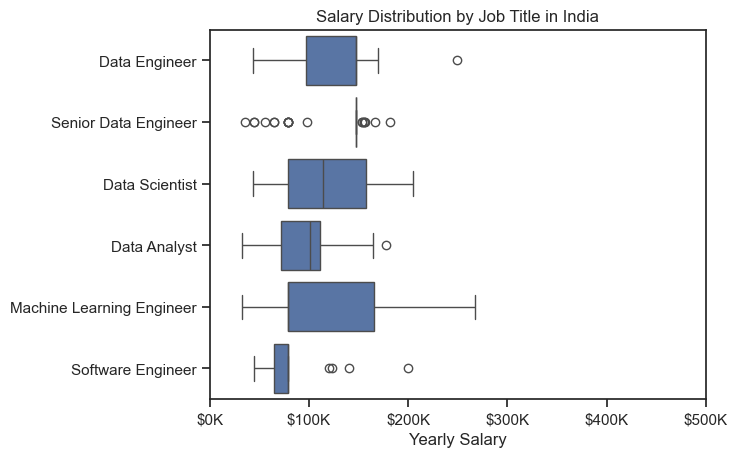

In [17]:
sns.boxplot(data=df_IND_top6, x='salary_year_avg', y='job_title_short',order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution by Job Title in India')
plt.xlabel('Yearly Salary')
plt.ylabel('')
plt.xlim(0, 500000)
ticks_x= plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()